In [25]:
import numpy as np
import json
from typing import List
import math
import os, os.path
from collections import defaultdict
import matplotlib.pyplot as plt

Got a dataset from Slay The Spire official discord where Baalor posted data about around 700 of his runs in 2022.

### Can we deterministically say what's the state of the deck at any floor?


In [4]:
data = json.load(open("C:/Users/lgerretsen/perso/perso/sts/2019-05-31-00-53#1028.json", "r"))


In [14]:
sample = data[0]
assert set(sample.keys()) == {'event'}
sample = sample["event"]
sample.keys()

dict_keys(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score', 'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices', 'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck', 'relics', 'potions_floor_usage', 'damage_taken', 'seed_played', 'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen', 'items_purchased', 'campfire_rested', 'item_purchase_floors', 'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily', 'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp', 'path_taken', 'build_version', 'purchased_purges', 'victory', 'max_hp_per_floor', 'card_choices', 'player_experience', 'relics_obtained', 'event_choices', 'is_beta', 'boss_relics', 'items_purged_floors', 'is_endless', 'potions_floor_spawned', 'killed_by', 'ascension_level'])

In [15]:
sample["neow_bonus"]

'REMOVE_TWO'

In [16]:
sample["items_purged_floors"]


[7]

In [24]:
idx = 0
while 1:
    sample = data[idx]["event"]
    if sample["victory"]:
        break
    idx += 1
json.dump(sample, open("./example_vanilla.run", "w"), indent=4)

,Unnamed: 0,epoch,training_loss,training_L_inf,training_L_1,val_loss,val_L_inf,val_L_1
0,0,0.0,2.487285,0.906250,0.550022,1.76665,0.683105,0.244421
1,1,1.0,1.725047,0.707031,0.248828,1.93333,0.642578,0.210594
2,2,2.0,1.925217,0.691406,0.228580,NaN,NaN,NaN
3,3,3.0,1.940199,0.644531,0.212239,NaN,NaN,NaN
4,4,4.0,2.141229,0.691406,0.227278,NaN,NaN,NaN


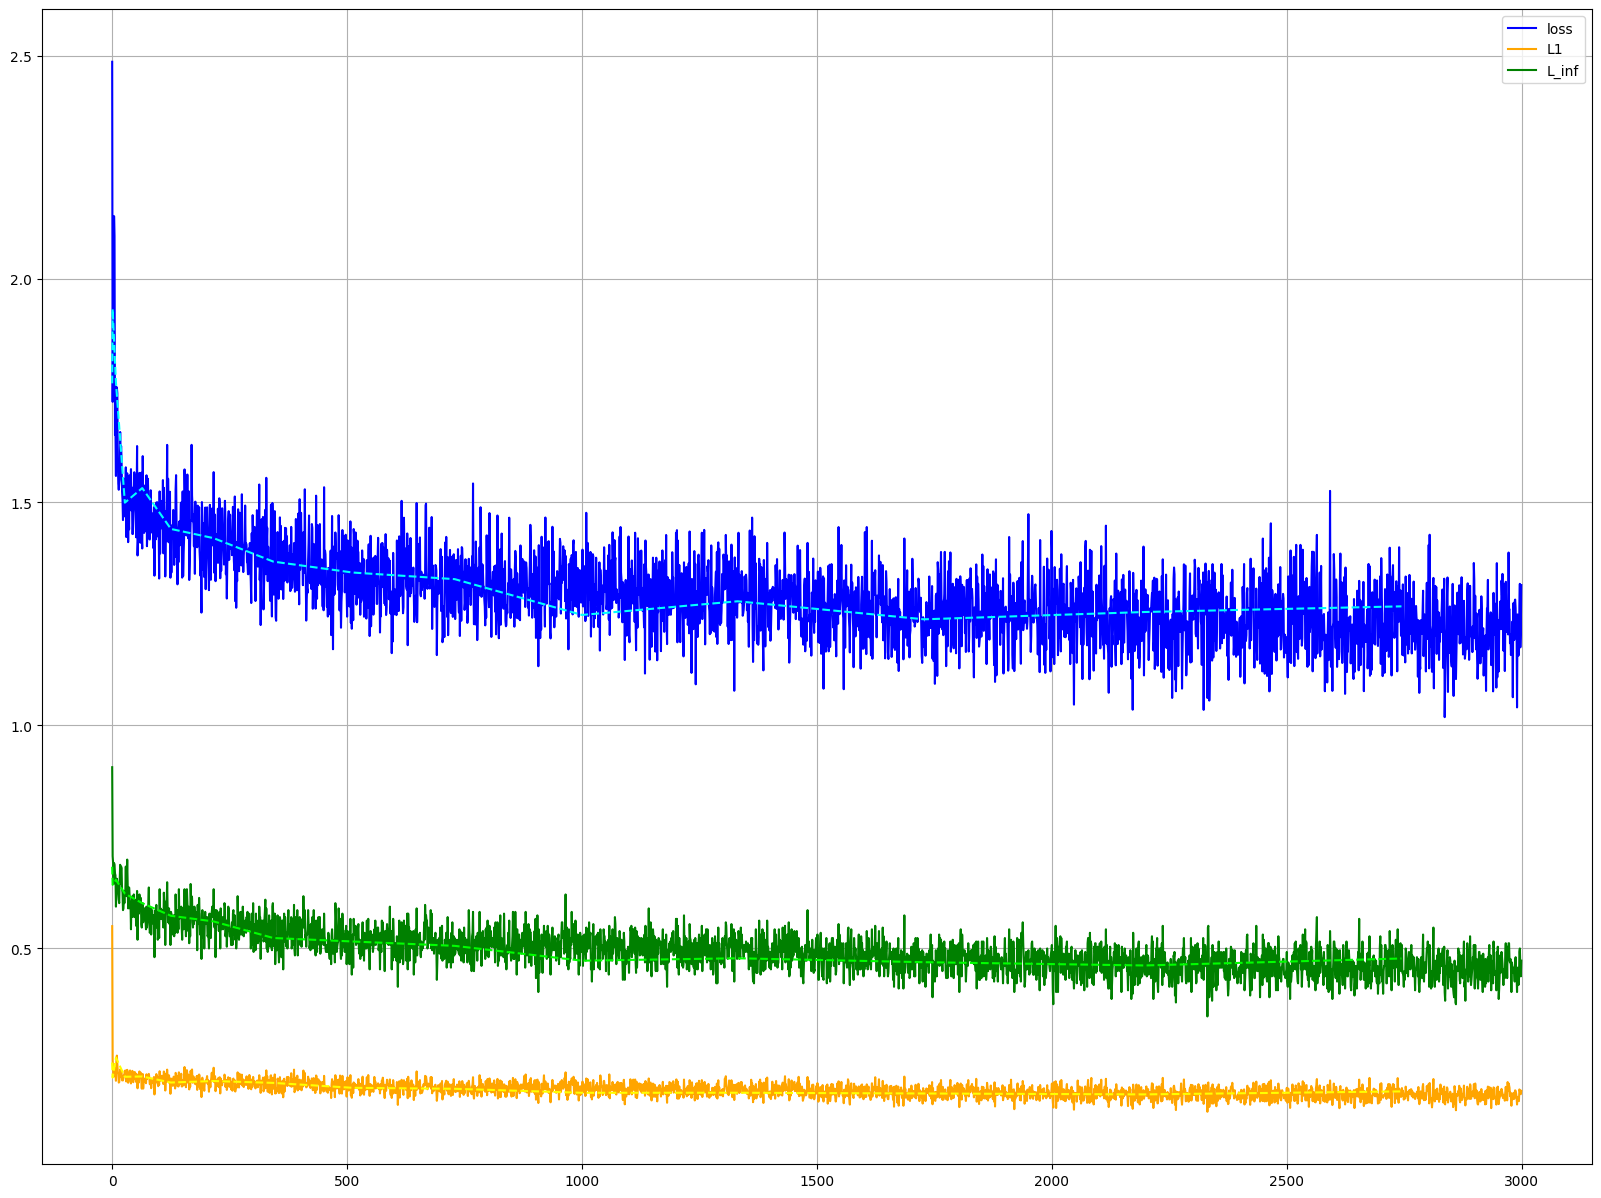

In [10]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import time

training_dirname = ""
training_dirname = "2023-01-07-20-10-29_blocks4-256_split0.8"
# training_dirname = "2023-01-06-20-25-13_21400_blocks4-256_split0.8"
# training_dirname = "2023-01-01-14-41-22_november_blocks4-256_split0.8"
# training_dirname = "2023-01-01-14-13-45_november_blocks4-256_split0.2"
# training_dirname = "2023-01-01-14-10-46_november_blocks4-128_split0.001"
# training_dirname = "2022-12-23-21-39-39_november_blocks8"
# training_dirname = "2022-12-21-22-51-42_november"

plt.figure(figsize=(20,15))

while 1:
    df = pd.read_csv(f"../trainings/{training_dirname}/metrics.csv")

    plt.cla()
    plt.grid()

    epochs = df.epoch
    plt.plot(epochs, list(df.training_loss), color="blue", label="loss")
    plt.plot(epochs, list(df.training_L_1), color="orange", label="L1")
    plt.plot(epochs, list(df.training_L_inf), color="green", label="L_inf")

    def plot_holed_values(epochs, values, color, linestyle):
        xs = [x for x,val in zip(epochs, values) if not math.isnan(val)]
        ys = [val for x,val in zip(epochs, values) if not math.isnan(val)]
        plt.plot(xs, ys, color=color, linestyle=linestyle)
    plot_holed_values(epochs, list(df.val_loss), color="cyan", linestyle='dashed')
    plot_holed_values(epochs, list(df.val_L_1), color="yellow", linestyle='dashed')
    plot_holed_values(epochs, list(df.val_L_inf), color="lime", linestyle='dashed')
    plt.legend()
    # plt.pause(1.)

    break

df.head()



In [1]:
import re
import pandas as pd
import numpy as np
from glob import glob
import os, os.path
import json
import torch

from sts_ml.train import Model, pad_samples, TRAINING_DIR, PARAMS_FILENAME
from sts_ml.infer import count_parameters, TRAINING_DIR, PARAMS_FILENAME, pad_samples

training_dirname = ""
training_dirname = "2023-01-14-15-23-42_blocks1-256_split0.8"
# training_dirname = "2023-01-14-14-58-28_blocks1-256_split0.8"
# training_dirname = "2023-01-14-12-26-24_blocks4-256_split0.8"
# training_dirname = "2023-01-06-23-41-35_21400_blocks4-256_split0.8"
# training_dirname = "2023-01-06-20-25-13_21400_blocks4-256_split0.8"

training_dir = os.path.join(".", TRAINING_DIR, training_dirname)
params = json.load(open(os.path.join(training_dir, PARAMS_FILENAME), "r"))

# dataset = json.load(open("./SlayTheData_win_a20_ic_21400.data", "r"))
dataset = json.load(open(params["train"]["dataset"], "r"))
dataset = pad_samples(dataset)

split = params["train"]["split"]
train_val_split = int(split * len(dataset))
train_dataset = dataset[:train_val_split]
val_dataset = dataset[train_val_split:]



In [11]:
training_dirname = ""
training_dirname = "2023-01-14-15-23-42_blocks1-256_split0.8"
# training_dirname = "2023-01-14-15-04-01_blocks1-256_split0.8"
# training_dirname = "2023-01-14-14-58-28_blocks1-256_split0.8"
# training_dirname = "2023-01-14-12-26-24_blocks4-256_split0.8"
# training_dirname = "2023-01-06-23-41-35_21400_blocks4-256_split0.8"
# training_dirname = "2023-01-06-20-25-13_21400_blocks4-256_split0.8"

training_dir = os.path.join(".", TRAINING_DIR, training_dirname)

batch_size = int(2**8)
model = Model(params)

ckpt_filename = os.path.join(training_dir, "0.ckpt")
ckpt = 0

state_dict = torch.load(ckpt_filename)
assert count_parameters(list(model.parameters())) == count_parameters(list(state_dict.values())), (count_parameters(list(model.parameters())), count_parameters(list(state_dict.values())))
model.load_state_dict(state_dict)
model.eval()


Model(
  (embedding): Embedding(375, 256)
  (blocks): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
  )
  (projection): Linear(in_features=256, out_features=2, bias=True)
)

In [10]:
for p, key, q in zip(list(model.parameters()), list(state_dict.keys()), list(state_dict.values())):
    if p.shape != q.shape:
        assert False, (key, p.shape,q.shape)

AssertionError: ('embedding.weight', torch.Size([375, 256]), torch.Size([366, 256]))

In [12]:
# logits, cross_ent_loss, l_inf, l_1 = model.predict_samples(train_dataset[:batch_size])
# print(logits, cross_ent_loss, l_inf, l_1)

# logits, cross_ent_loss, l_inf, l_1 = model.predict_samples(val_dataset[:batch_size])
# print(logits[:10,-10:,0])

logits, cross_ent_loss, l_inf, l_1 = model.predict_samples(val_dataset[:1])
logits


tensor([[[0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
         [0.3984, 0.6016],
 

In [5]:
logits.shape

torch.Size([1, 92, 2])

In [4]:
val_dataset[:1]

[{'deck': ['PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',
   'PAD_TOKEN',


In [6]:
from sts_ml.deck_history import card_to_n_upgrades
from sts_ml.train import token_to_index

samples = val_dataset[:1]

padded_samples = pad_samples(samples)
batched_idxes = []
deck_sizes = []
n_upgrades = []
for sample in padded_samples:
    tokens = sample["deck"] + sample["cards_picked"] + sample["cards_skipped"]
    idxes = [token_to_index(token) for token in tokens]
    batched_idxes.append(idxes)
    deck_sizes.append(len(sample["deck"]))
    n_upgrades.append([card_to_n_upgrades(token) for token in tokens])
batched_idxes = np.array(batched_idxes)
batched_idxes = torch.from_numpy(batched_idxes).to(model.device)
deck_sizes = np.array(deck_sizes)
n_upgrades = np.array(n_upgrades)
n_upgrades = torch.from_numpy(n_upgrades).to(model.device)

In [10]:
print(tokens)

['PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'PAD_TOKEN', 'defend_r+1', 'defend_r+1', 'defend_r+1', 'defend_r+1', 'strike_r+1', 'strik

In [15]:
token_to_index(ALL_TOKENS[2])

2

In [12]:
batched_idxes

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 351, 351, 351, 351, 239, 239, 239, 239, 124, 348, 144, 105, 312,
          87, 157, 218, 253, 221, 253,  35, 112]], device='cuda:0',
       dtype=torch.int32)

In [17]:
ALL_TOKENS[1]

'eviscerate'

In [2]:
from sts_ml.train import ALL_TOKENS
ALL_TOKENS.index('defend_r')

145

In [5]:
len(ALL_TOKENS)

457